NEW DATASET: We had previously selected a dataset with tweets and understanding that analyzing the language in those messages may be out of a feasible scope, we switched to a dataset regarding chess games. This contains meta data about games including wins, time, opening moves, full move list, etc. Using this a lot of insight on strong openings and certain gameplay features can be analyzed.

In [ ]:
import pandas as pd

games_df = pd.read_csv("games.csv")
display(games_df)
print(games_df.dtypes)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object


In [ ]:
# Data Cleaning

from datetime import datetime

test_start = games_df['created_at'].apply(lambda x: datetime.utcfromtimestamp(x /1000))
test_end = games_df['last_move_at'].apply(lambda x: datetime.utcfromtimestamp(x /1000))

# drops all rows where the time difference is 0 milliseconds
games_df = games_df[games_df['created_at'] - games_df['last_move_at'] != 0]
print(games_df.shape)

games_df['Time_Difference'] = games_df['last_move_at'] - games_df['created_at']
print(games_df['Time_Difference'])

(11510, 16)
14       10000000.0
43       10000000.0
49       10000000.0
52       10000000.0
54       10000000.0
            ...    
20053      321734.0
20054      744219.0
20055      172834.0
20056      946699.0
20057      736699.0
Name: Time_Difference, Length: 11510, dtype: float64


<ipython-input-86-af0db6c82452>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['Time_Difference'] = games_df['last_move_at'] - games_df['created_at']


In [ ]:
info = games_df.count()
print(info)
duplicated_rows = games_df[games_df.duplicated()]
print(len(duplicated_rows))
games_df.drop_duplicates(inplace=True)
print(games_df.shape)
count_unique_ids = games_df['id'].nunique()
print(count_unique_ids)

id                 11510
rated              11510
created_at         11510
last_move_at       11510
turns              11510
victory_status     11510
winner             11510
increment_code     11510
white_id           11510
white_rating       11510
black_id           11510
black_rating       11510
moves              11510
opening_eco        11510
opening_name       11510
opening_ply        11510
Time_Difference    11510
dtype: int64
414
(11096, 17)
11056


<ipython-input-87-0cc0fb1c1ba3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df.drop_duplicates(inplace=True)


All the columns seem to have the same number of values, meaning there are no values and nothing needs to be imputed.

Null Hypothesis: Playing white or black has no effect on your likelihood of winning the game.

Alternative Hypothesis: The color you play (white or black) has a statistically significant effect on your likelihood of winning the game

14       1.0
43       1.0
49       1.0
52       1.0
54       1.0
        ... 
20053    1.0
20054    0.0
20055    1.0
20056    1.0
20057    0.0
Name: winner_binary, Length: 11096, dtype: float64
t-statistic: 5.491342104698968
p-value: 4.076786993028804e-08


<ipython-input-88-a7f66c1b06e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['winner_binary'] = games_df['winner'].apply(lambda x: 1 if x == 'white' else 0.5 if x == 'draw' else 0)


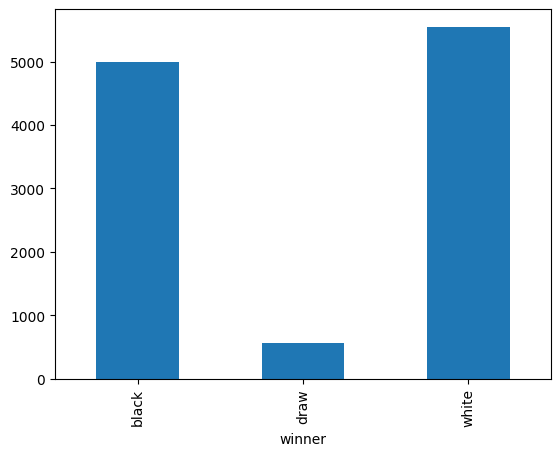

In [ ]:
# This code creates a new column called 'winner_binary' which saves the winner as 0 if black won and 1 if white won.
# This code creates a new column called 'winner_binary' which saves the winner as 0 if black won and 1 if white won.
import matplotlib.pyplot as plt
import scipy.stats as stats

games_df['winner_binary'] = games_df['winner'].apply(lambda x: 1 if x == 'white' else 0.5 if x == 'draw' else 0)
print(games_df['winner_binary'])
games_df.groupby('winner')['winner'].count().plot(kind='bar')
t_stat, p_val = stats.ttest_1samp(games_df['winner_binary'], 0.5)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")

There is no effect of the color in the likelihood of winning the game. This is due to the high p-value suggesting that the Null Hypothesis is true.



Null Hypothesis: The time the game is played does not differ depending whether the most common opening move is used.

Alternative Hypothesis: The time the game is played does differentiate when the most common opening move is used.

Z-test

Treat full dataset as general game population to test for potential difference in means between the time it takes a regular game and game with specific opening move

In [ ]:
# Z-test
from scipy import stats
import numpy as np


# Treat full dataset as general game population to test for potential difference in means between the time it takes a regular game and game with specific opening move

pop_mean = games_df['Time_Difference'].mean()
pop_std = games_df['Time_Difference'].std()

opening_mode = games_df['opening_name'].mode().iloc[0]
sample_games = games_df[games_df['opening_name'] == opening_mode]
sample_time = sample_games['Time_Difference']

def one_sample_z_test(sample_data, population_mean, population_stddev):
    z_score = (np.mean(sample_data) - population_mean) / (population_stddev / np.sqrt(len(sample_data)))
    p_value = stats.norm.cdf(z_score)
    return p_value

print("P value: ", one_sample_z_test(sample_time, pop_mean, pop_std))

P value:  0.15349975139881228


The P-Value is higher than 0.05, so we fail to reject the Null Hypothesis and conclude that the most common opening move does not affect the time duration of the game.

**Two Sample T-Test**

Null Hypothesis: The rating has no effect on the time the game takes.

Alternative Hypothesis: The rating has an effect on the time that the game takes.

In [ ]:
# T-test
from scipy.stats import ttest_ind

rated_false = games_df[games_df['rated'] == False]['Time_Difference']
rated_true = games_df[games_df['rated'] == True]['Time_Difference']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(rated_false, rated_true, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: 2.1801562848989904
P-value: 0.02935290314783751


Since the p-value is less than our significance level, 0.02935 < 0.05, we accept the alternative hypothesis that the rating does have an effect on the time that the game takes.